#### Activities: EDA & Visualization

1. Exploratory Data Analysis in Pandas  
* Look for trends, outliers, and relationships:
    * Churn distribution
    * Churn vs tenure, monthly charges, total charges
    * Churn vs contract type, internet service, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_file_path = r"C:\Users\comat\GitProjects\customer-churn-ai\data\cleaned_telco_churn.csv"

try:
    df = pd.read_csv(clean_file_path)
    print("Data Loaded Successfully! Sensational!")
except FileNotFoundError:
    print(f"Error: File not found at {clean_file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Data Loaded Successfully! Sensational!


In [ ]:
# Set Visualization Style
sns.set_theme(style="whitegrid")

Churn Count

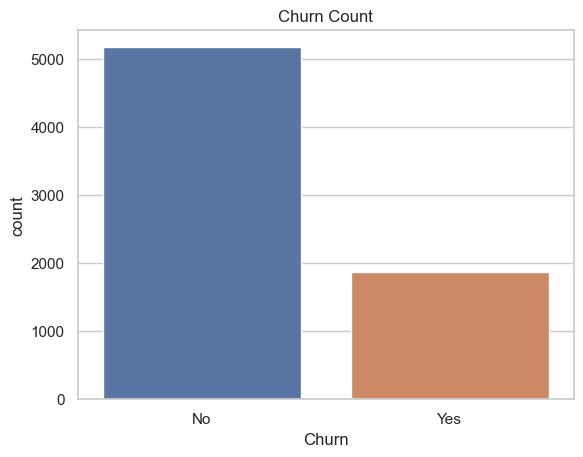

In [10]:
# Churn distribution
sns.countplot(data=df, x="Churn", hue="Churn")
plt.title("Churn Count")
plt.show()

Insight: More people did not Churn than Churned.

---
Churn vs MonthlyCharges

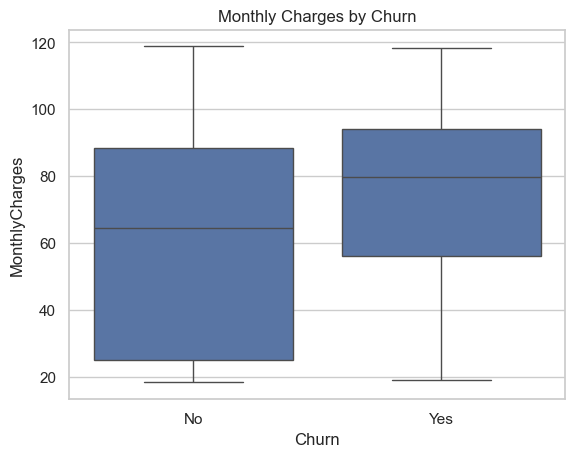

In [47]:
# Churn vs MonthlyCharges
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn")
plt.show()


➤ "No" group (stayed):  
-Median (center line in box): Around $65  
-Middle 50% pay between ~$30–$85 (the IQR)  
-Wider distribution and lower average cost compared to churners

➤ "Yes" group (churned):  
-Median is higher, around $80+  
-The entire box is shifted upward  
-Indicates that churned customers tend to pay higher monthly charges  

>Insight: Higher monthly charges are linked to a higher likelihood of churn.

---
Total Charges by Churn

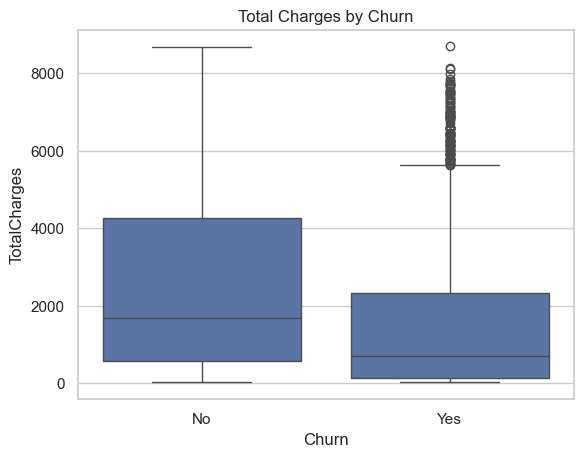

In [46]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Total Charges by Churn")
plt.show()

➤ "No" group (stayed):  
-Median is around $2,000  
-Distribution is wide (many pay even $8,000+ over time)  
-Fewer low-value customers  

➤ "Yes" group (churned):  
-Median is below $1,000  
-Heavy clustering near the lower range  
-Large number of outliers around $4,000–$6,000 (customers who paid a lot, but still churned)  

> Insight: Customers who churn tend to have much lower lifetime value (TotalCharges), likely because they leave early.

---
Churn vs Tenure

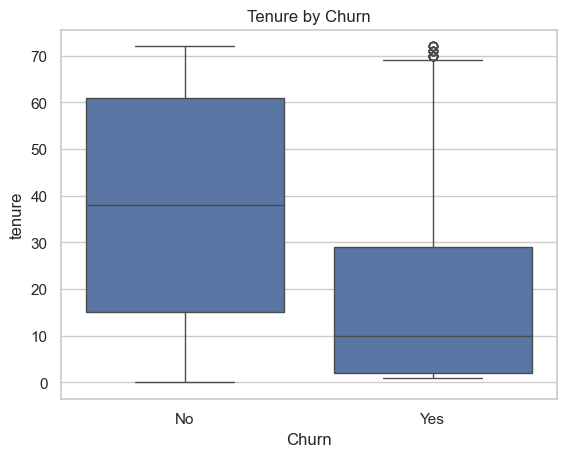

In [16]:
# Churn vs Tenure
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure by Churn")
plt.show()


➤ "No" group (stayed):  
-Median is around 38-40 months  
-Middle 50% of customers stayed between 15-60 months  
-Max tenure is 72 months  
-No outliers  
➤ "Yes" group (churned):  
-Median is below 10 months  
-Most churned between 1 and 29 months.  
-A few long-tenured outliers near 70 months (some surprising cases of long-time customers who still left)  

> Insight: Churn is high in early months, so an argument could be makde for early intervention/retention strategies. The longer they stay, the less likely they churn...duh.

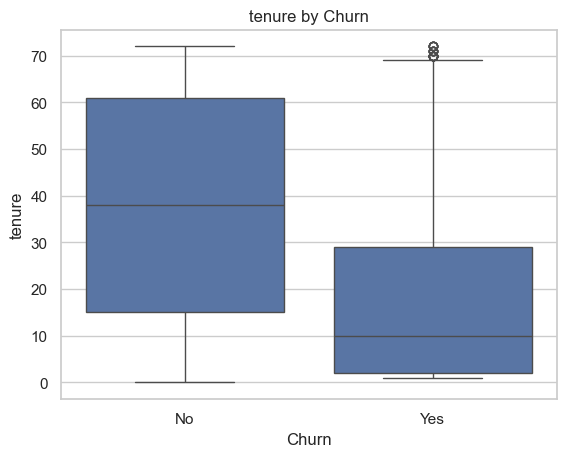

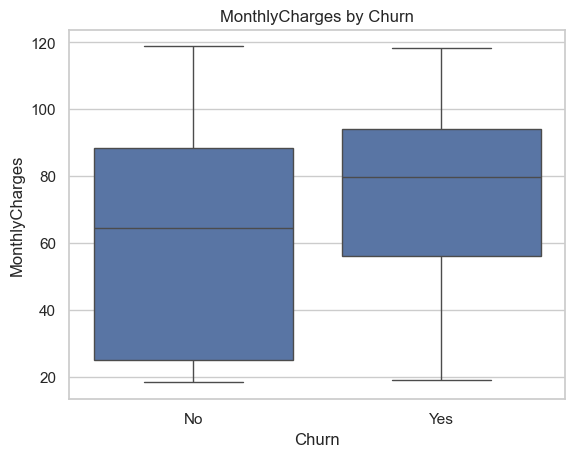

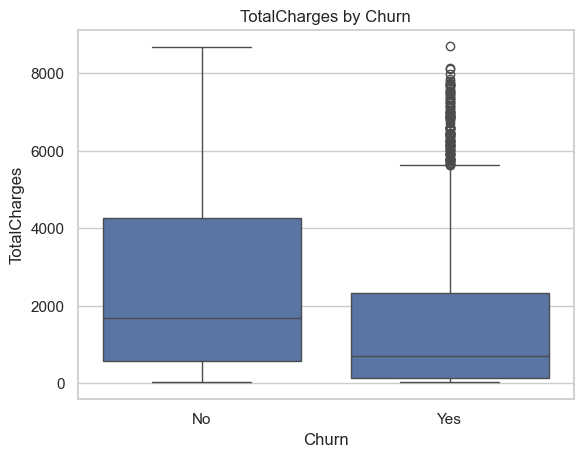

In [45]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in numeric_cols:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} by Churn")
    plt.show()

---
Churn Count by Contract Type

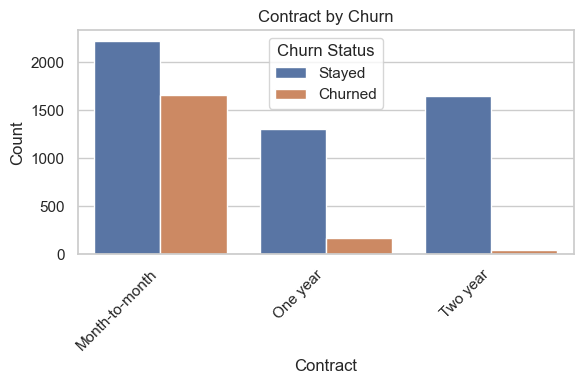

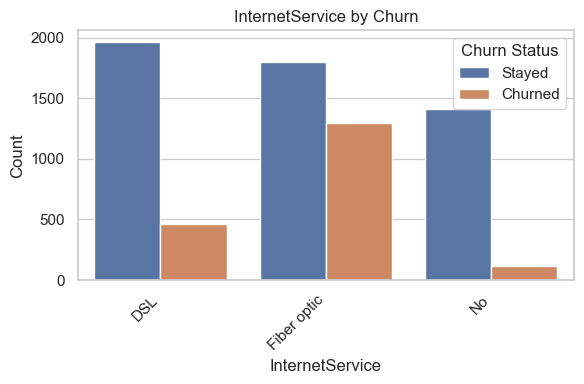

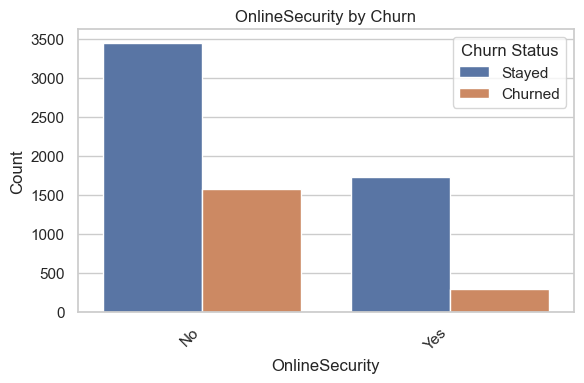

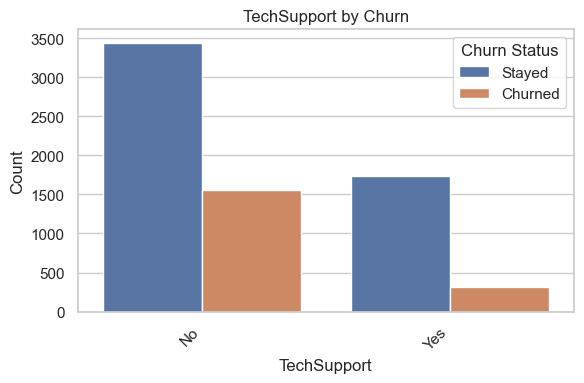

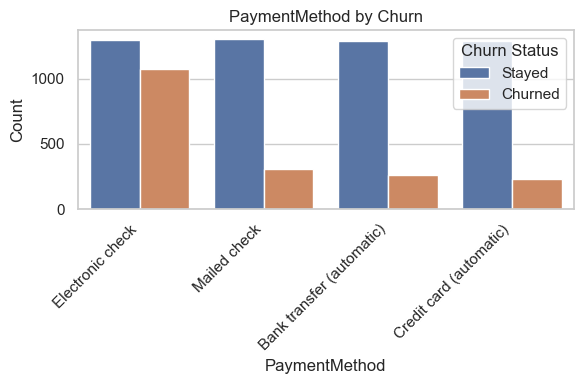

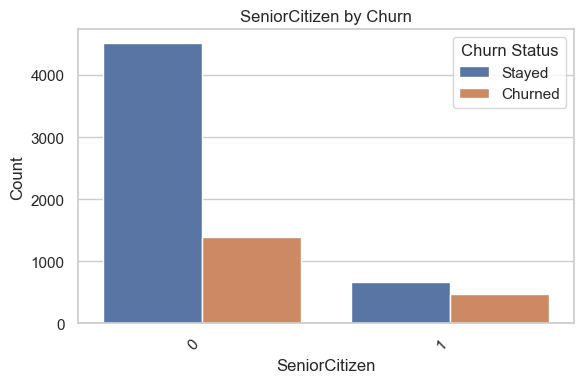

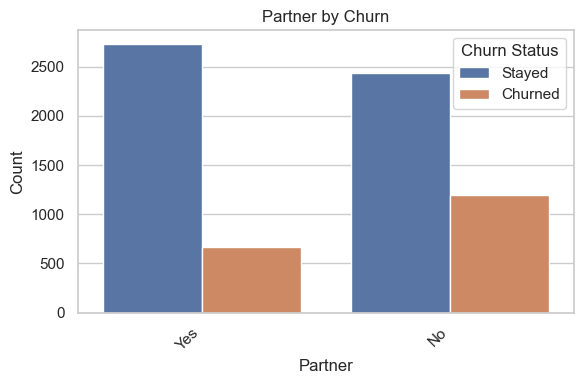

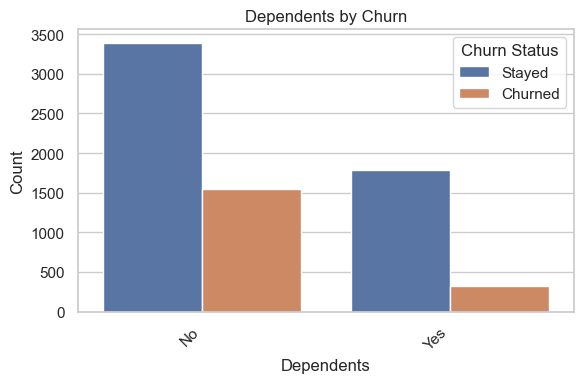

In [65]:
categorical_cols = ['Contract', 'InternetService', 'OnlineSecurity',
                    'TechSupport', 'PaymentMethod',
                    #"gender",
                    "SeniorCitizen", "Partner", "Dependents"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col) # Explicitly label the x-axis
    plt.ylabel('Count') # Explicitly label the y-axis

    # Get the current legend object
    legend = ax.get_legend()

    # Update the legend labels
    if legend is not None:
        legend.set_title('Churn Status')
        new_labels = ['Stayed', 'Churned']
        for text, label in zip(legend.texts, new_labels):
            text.set_text(label)

    plt.tight_layout()
    plt.show()


| Feature  | Your Observation  | Analyst Take  |
| ------- | ---------- | ------ |
| **Contract** | Month-to-month users churn more. Suggest early engagement.  | ✅These users churn the most. Engagement and promotions within the first few months could improve retention. |
| **InternetService** | More users have Fiber. Unsure of meaning. | ✅ Correct on the volume. 📌 Action item: Check churn **rate** within each service. Fiber may be associated with higher churn due to cost or reliability issues. |
| **OnlineSecurity**  | People with security churn less.  | ✅ Strong indicator that value-added services (like security) correlate with loyalty. Could reflect higher satisfaction or engagement.  |
| **TechSupport**  | People with tech support churn less. Could promote it more. | ✅Like security, this service likely reduces frustration and improves perceived value. Marketing this could be effective.  |
| **PaymentMethod** | Most users pay with electronic check.  | ✅ Action Item: This method has **higher churn rates** in many Telco datasets. Worth analyzing churn rate by payment type.    |
|gender|no difference in gender churn||
|SeniorCitizen|churned far less|sadly, they probably forget, but that's on them. Target more.|
|Partner| More non-partners churned|It's not a big difference|
|Dependents|Dependents  churn less||

In [18]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,2,...,2,2,2,2,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,5024,...,4621,4999,4336,4311,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


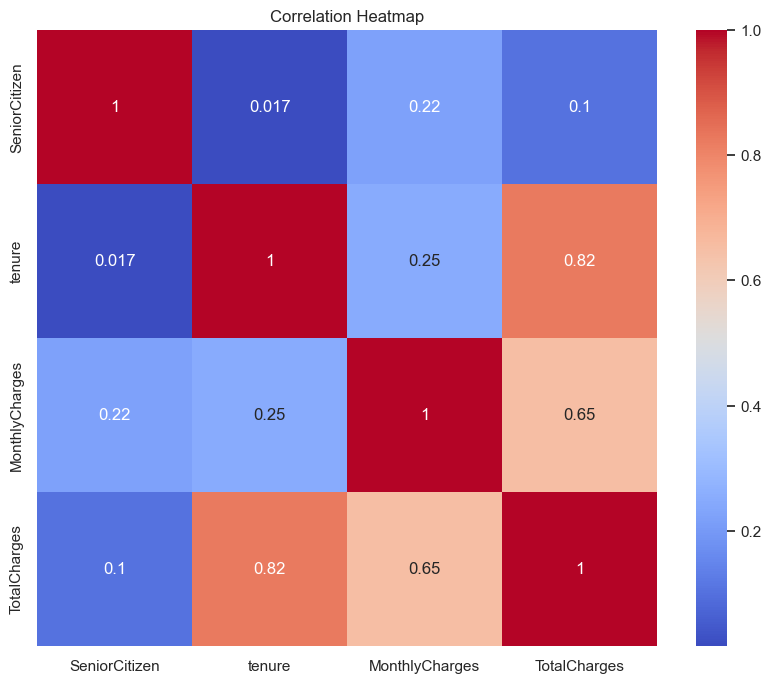

In [19]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()